In [19]:
import numpy as np
import pandas as pd
import geopandas as gp

import os
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
bay_county_names = ["Alameda", "ContraCosta", "Sonoma", "Solano", "SanMateo", "SantaClara", "SanFrancisco", "Marin","Napa"] 
years1 = ["2009"]
years2 = ["2013", "2014"]
years3 = ["2015", "2016", "2017"]


data_path = '/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/data/parsed_data_1/'


In [75]:
#get all the files for all bay area counties for years in each of the periods and concatenate them
files_1 = [f for f in os.listdir(data_path) if f[-3:] == "csv" and f.split('_')[1] in years1]
files_2 = [f for f in os.listdir(data_path) if f[-3:] == "csv" and f.split('_')[1] in years2]
files_3 = [f for f in os.listdir(data_path) if f[-3:] == "csv" and f.split('_')[1] in years3]

dfs = []
for file in files_1:   
    df = pd.read_csv(data_path+file)
    dfs.append(df)
    years1_data = pd.concat(dfs, axis=0)
    
for file in files_2:   
    df = pd.read_csv(data_path+file)
    dfs.append(df)
    years2_data = pd.concat(dfs, axis=0)
    
    
for file in files_3:   
    df = pd.read_csv(data_path+file)
    dfs.append(df)
    years3_data = pd.concat(dfs, axis=0)

all_years_groups = pd.concat([years1_data, years2_data, years3_data], axis=0)
# all_recovery.to_csv('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/regression/loan_income_breakdown_tract.csv', index=False)
all_years_groups

,Tract,Year,County,type,CRA Eligible,inc_ratio,"% HI borrower, LI tract","# HI borrower, LI tract","% HI borrower, HI tract","# HI borrower, HI tract","% LI borrower, LI tract","# LI borrower, LI tract","%LI borrower, HI tract","# LI borrower, HI tract",Geoid
0,3010.00,2009,Contra Costa County,mod,eligible,71.839996,0.705882,36,0.000000,0,0.294118,15,0.000000,0,6013301000
1,3020.02,2009,Contra Costa County,mid,not eligible,90.500000,0.000000,0,0.469208,160,0.000000,0,0.530792,181,6013302002
2,3020.03,2009,Contra Costa County,mid,not eligible,99.889999,0.000000,0,0.296552,43,0.000000,0,0.703448,102,6013302003
3,3020.04,2009,Contra Costa County,mid,not eligible,113.519997,0.000000,0,0.545455,210,0.000000,0,0.454545,175,6013302004
4,3031.00,2009,Contra Costa County,mod,eligible,77.019997,0.583062,179,0.000000,0,0.416938,128,0.000000,0,6013303100
5,3032.00,2009,Contra Costa County,mid,not eligible,115.410004,0.000000,0,0.615262,387,0.000000,0,0.384738,242,6013303200
6,3040.00,2009,Contra Costa County,high,not eligible,129.619995,0.000000,0,0.711111,224,0.000000,0,0.288889,91,6013304000
7,3050.00,2009,Contra Costa County,low,eligible,48.279999,0.103448,3,0.000000,0,0.896552,26,0.000000,0,6013305000
8,3060.01,2009,Contra Costa County,mod,eligible,71.660004,0.194444,14,0.000000,0,0.805556,58,0.000000,0,6013306001
9,3060.02,2009,Contra Costa County,mid,not eligible,91.860001,0.000000,0,0.244898,12,0.000000,0,0.755102,37,6013306002


In [76]:
#take the subset of the tracts that are CRA eligible and save them to a new dataframe
LMItracts = all_years_groups[all_years_groups["CRA Eligible"] == "eligible"]
len(LMItracts)

4508

In [77]:
#crosswalk used to assign census tracts to places
crosswalk = pd.read_csv("/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/data/reference/geocorr2014.csv")
crosswalk["Place name"].replace(to_replace=' ', value='unincorporated non CDP', inplace=True)
crosswalk.head()


,County code,Tract,State code,Place code,State abbreviation,County name,Place name,Total housing units (2010),tract to placefp allocation factor
0,6013,3400.02,6,135,CA,Contra Costa CA,"Acalanes Ridge CDP, CA",457,0.151
1,6001,4271.00,6,562,CA,Alameda CA,"Alameda city, CA",1469,1
2,6001,4272.00,6,562,CA,Alameda CA,"Alameda city, CA",1730,1
3,6001,4273.00,6,562,CA,Alameda CA,"Alameda city, CA",2212,1
4,6001,4276.00,6,562,CA,Alameda CA,"Alameda city, CA",1881,1


In [98]:
recovery_places_LMI = pd.merge(crosswalk, LMItracts, how='right', left_on='Tract', right_on='Tract') #code by place
#because this dataframe only has CRA eligible tracts, total loans is the sum of the loans to high income borrowers
#and low income borrowers in low income tracts only
recovery_places_LMI["Total Loans"] = recovery_places_LMI["# HI borrower, LI tract"]+ recovery_places_LMI["# LI borrower, LI tract"]

recovery_places_LMI.rename(columns={"# LI borrower, LI tract": "Loans to LM borrowers", 
                             "# HI borrower, LI tract": "Loans to MH borrowers"}, inplace=True)

recovery_places_LMI["CRA Eligible"] = recovery_places_LMI["CRA Eligible"].apply(lambda x: x.replace("not eligible", "0").replace("eligible", "1"))
recovery_places_LMI["CRA Eligible"].astype(int)
recovery_places_LMI.head()


,County code,Tract,State code,Place code,State abbreviation,County name,Place name,Total housing units (2010),tract to placefp allocation factor,Year,...,"% HI borrower, LI tract",Loans to MH borrowers,"% HI borrower, HI tract","# HI borrower, HI tract","% LI borrower, LI tract",Loans to LM borrowers,"%LI borrower, HI tract","# LI borrower, HI tract",Geoid,Total Loans
0,6001.0,4272.0,6.0,562.0,CA,Alameda CA,"Alameda city, CA",1730.0,1,2009,...,0.894737,17,0.0,0,0.105263,2,0.0,0,6001427200,19
1,6001.0,4272.0,6.0,562.0,CA,Alameda CA,"Alameda city, CA",1730.0,1,2009,...,0.894737,17,0.0,0,0.105263,2,0.0,0,6001427200,19
2,6001.0,4272.0,6.0,562.0,CA,Alameda CA,"Alameda city, CA",1730.0,1,2013,...,0.952381,20,0.0,0,0.047619,1,0.0,0,6001427200,21
3,6001.0,4272.0,6.0,562.0,CA,Alameda CA,"Alameda city, CA",1730.0,1,2014,...,1.000000,20,0.0,0,0.000000,0,0.0,0,6001427200,20
4,6001.0,4272.0,6.0,562.0,CA,Alameda CA,"Alameda city, CA",1730.0,1,2009,...,0.894737,17,0.0,0,0.105263,2,0.0,0,6001427200,19


In [190]:
df_lol = []
for place_yr, place_df in recovery_places_LMI.groupby(["Place name", "Year"]):
    pct_LCTs_HIB = place_df["Loans to MH borrowers"].sum()/place_df["Total Loans"].sum()
    year = place_yr[1]
    place_nm = place_yr[0]
    total = place_df["Total Loans"].sum()

    #     row_list = [place_nm, year, place_df["Total Loans"].sum(), len(place_df["CRA Eligible"]), pct_LCTs_HIB]
#     df_lol.append(row_list)

    row_list = [place_nm, year, total, pct_LCTs_HIB]
    df_lol.append(row_list)

                
                
# recovery_loans_byincome_place = pd.DataFrame(df_lol, columns=["Place Name", "Year", "Total loans","LMI tracts", "pct loans to MH borrowers in LM tracts"])
recovery_loans_byincome_place = pd.DataFrame(df_lol, columns=["Place Name", "Year", "Total Loans", "pct loans to MH borrowers in LM tracts"])
#recovery_loans_byincome_place.to_csv("/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/recovery_loans_byincomeandplace_new.csv", index=False)
recovery_loans_byincome_place.head()

,Place Name,Year,Total Loans,pct loans to MH borrowers in LM tracts
0,"Alameda city, CA",2009,114,0.789474
1,"Alameda city, CA",2013,132,0.878788
2,"Alameda city, CA",2014,130,0.923077
3,"Alameda city, CA",2015,56,0.857143
4,"Alameda city, CA",2016,59,0.966102


Get the top 10 cities in total loans over all of the years, take top 11 but drop 'unincorporated non CDP' category

In [243]:
top10 = list((recovery_loans_byincome_place.groupby(['Place Name'])['Total Loans'].sum()).sort_values(ascending=False)[0:11].keys())
# .remove('unincorporated non CDP')
del top10[1]
top10

['San Jose city, CA',
 'Oakland city, CA',
 'San Francisco city, CA',
 'Richmond city, CA',
 'Hayward city, CA',
 'Santa Rosa city, CA',
 'Pittsburg city, CA',
 'Antioch city, CA',
 'San Leandro city, CA',
 'Concord city, CA']

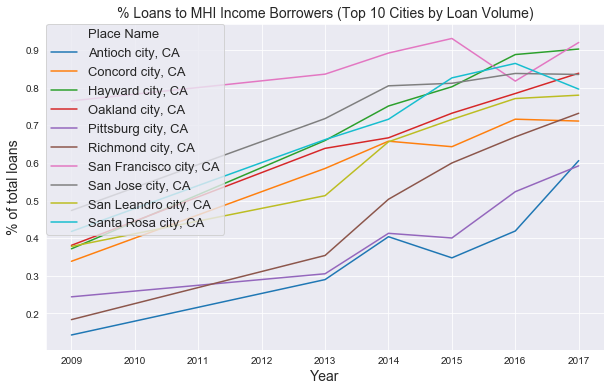

In [285]:
plt.figure(figsize=(10, 6));
timeline = recovery_loans_byincome_place[(recovery_loans_byincome_place["Place Name"].isin(top10))]
plt.title("% Loans to MHI Income Borrowers (Top 10 Cities by Loan Volume)", fontsize=14);
sns.lineplot(x="Year", y="pct loans to MH borrowers in LM tracts",hue="Place Name", data=timeline);
plt.ylabel("% of total loans", fontsize=14)
plt.xlabel("Year", fontsize=14)

plt.legend(bbox_to_anchor=(.0, 1), loc=2, borderaxespad=0.,prop={'size': 13});
plt.savefig("/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/results/plots/%loansmhi_top10.jpg")

In [100]:
len(recovery_loans_byincome_place[recovery_loans_byincome_place["pct loans to MH borrowers in LM tracts"] <= .80])/len(recovery_loans_byincome_place)


0.4247787610619469

In [267]:
# recovery_loans_byincome_place[(recovery_loans_byincome_place["Total loans"] > 700) & (recovery_loans_byincome_place["Place Name"] != "unincorporated non CDP")]



#### Loans at the tract level

In [268]:
LMItracts1 = LMItracts.copy()
LMItracts1["Total Loans"] = LMItracts1["# HI borrower, LI tract"] + LMItracts1["# LI borrower, LI tract"]
LMItracts1["pct loans to MH borrowers in LMI tracts"] = LMItracts1['# HI borrower, LI tract']/ LMItracts1['Total Loans']
LMItracts1.head()


,Tract,Year,County,type,CRA Eligible,inc_ratio,"% HI borrower, LI tract","# HI borrower, LI tract","% HI borrower, HI tract","# HI borrower, HI tract","% LI borrower, LI tract","# LI borrower, LI tract","%LI borrower, HI tract","# LI borrower, HI tract",Geoid,Total Loans,pct loans to MH borrowers in LMI tracts
0,3010.00,2009,Contra Costa County,mod,eligible,71.839996,0.705882,36,0.0,0,0.294118,15,0.0,0,6013301000,51,0.705882
4,3031.00,2009,Contra Costa County,mod,eligible,77.019997,0.583062,179,0.0,0,0.416938,128,0.0,0,6013303100,307,0.583062
7,3050.00,2009,Contra Costa County,low,eligible,48.279999,0.103448,3,0.0,0,0.896552,26,0.0,0,6013305000,29,0.103448
8,3060.01,2009,Contra Costa County,mod,eligible,71.660004,0.194444,14,0.0,0,0.805556,58,0.0,0,6013306001,72,0.194444
11,3071.02,2009,Contra Costa County,mod,eligible,64.599998,0.185185,5,0.0,0,0.814815,22,0.0,0,6013307102,27,0.185185


In [29]:
len(LMItracts1[LMItracts1["pct loans to MH borrowers in LMI tracts"] <= .50])/len(LMItracts1)


0.15586034912718205

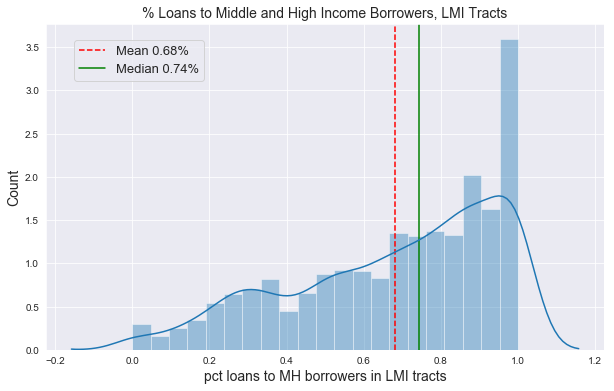

In [283]:
# plt.hist(recovery_loans_byincome_place["pct loans to MH borrowers in LM tracts"]);
plt.figure(figsize=(10, 6));

mean=LMItracts1["pct loans to MH borrowers in LMI tracts"].mean()
median=LMItracts1["pct loans to MH borrowers in LMI tracts"].median()
# mode=recovery_loans_byincome_place["pct loans to MH borrowers in LM tracts"].mode().get_values()[0]
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean '+ str(np.round(mean,2))+"%":mean,'Median '+ str(np.round(median,2))+"%":median}, bbox_to_anchor=(.05, .95), 
           loc=2, borderaxespad=0.,prop={'size': 13})



sns.set_style("darkgrid")
plt.title("% Loans to Middle and High Income Borrowers, LMI Tracts", fontsize=14);
plt.xlabel("% Loans to MHI borrowers", fontsize=14)
plt.ylabel("Count", fontsize=14)
sns.distplot(LMItracts1["pct loans to MH borrowers in LMI tracts"], hist=True);
plt.savefig("/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/results/plots/pct_MHI_tracts_hist.jpg")

In [101]:
udp = pd.read_csv("/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/reference/udp_2017results.csv")
udp.drop("old disp type", axis=1).head() #2131




,geo_fips,Typology
0,6087110300,LI - At Risk of Gentrification and/or Displace...
1,6113010302,MHI - At Risk of Exclusion
2,6113010701,LI - Not Losing Low Income Households
3,6077003407,LI - Ongoing Gentrification and/or Displacement
4,6067005803,MHI - Advanced Exclusion


In [102]:
tracts_udp = pd.merge(LMItracts1, udp, how='left', right_on='geo_fips', left_on='Geoid')
tracts_udp = tracts_udp.drop(["geo_fips", 'old disp type'], axis=1)
tracts_udp.head(10)
#tracts_udp["Typology"].unique()
tracts_udp.to_csv('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/recoveryloans_bytract_udp_new.csv')

In [125]:
# gentrification = ['LI - Ongoing Gentrification and/or Displacement', 'LI - At Risk of Gentrification and/or Displacement']

# gentrifying_tracts = tracts_udp[tracts_udp["Typology"].isin(gentrification)] 

LMI_ongoing_gentrifying = tracts_udp[tracts_udp["Typology"] == 'LI - Ongoing Gentrification and/or Displacement']
LMI_atrisk_gentrifying = tracts_udp[tracts_udp["Typology"] == 'LI - At Risk of Gentrification and/or Displacement']

LMI_not_gentrifying = tracts_udp[tracts_udp["Typology"] == 'LI - Not Losing Low Income Households']

mean_ongoing_gentrifying = LMI_ongoing_gentrifying["pct loans to MH borrowers in LMI tracts"].mean() #74%
mean_atrisk_gentrifying = LMI_atrisk_gentrifying["pct loans to MH borrowers in LMI tracts"].mean() #74%

median_ongoing_gentrifying = LMI_ongoing_gentrifying["pct loans to MH borrowers in LMI tracts"].median() #74%
median_atrisk_gentrifying = LMI_atrisk_gentrifying["pct loans to MH borrowers in LMI tracts"].median() #74%

                                     
print("mean pct in ongoing gentrifying LMI tracts", mean_ongoing_gentrifying) 
print("mean pct in at risk gentrifying LMI tracts", mean_atrisk_gentrifying) 
                                     
print("num ongoing gentrifying tracts", len(LMI_ongoing_gentrifying))
print("num at risk gentrifying tracts", len(LMI_atrisk_gentrifying))

print("median pct in ongoing gentrifying LMI tracts", median_ongoing_gentrifying) 
print("median pct in at risk gentrifying LMI tracts", median_atrisk_gentrifying) 



mean_not_gentrifying = LMI_not_gentrifying["pct loans to MH borrowers in LMI tracts"].mean() #68%
median_not_gentrifying = LMI_not_gentrifying["pct loans to MH borrowers in LMI tracts"].median() #68%

print("mean pct in non gentrifying LMI tracts", mean_not_gentrifying) 
print("median pct in non gentrifying LMI tracts", median_not_gentrifying) 
print("num not gentrifying tracts", len(LMI_not_gentrifying))

print(len(tracts_udp))

           
           
           
           
           

mean pct in ongoing gentrifying LMI tracts 0.8002062993825191
mean pct in at risk gentrifying LMI tracts 0.7432472526357724
num ongoing gentrifying tracts 638
num at risk gentrifying tracts 747
median pct in ongoing gentrifying LMI tracts 0.8561076604554865
median pct in at risk gentrifying LMI tracts 0.775
mean pct in non gentrifying LMI tracts 0.7320169736918836
median pct in non gentrifying LMI tracts 0.75
num not gentrifying tracts 557
2445


In [ ]:
#this part has issues with CDPs, etc. - fix this!

#### Make place data into geographies




In [118]:
def make_place_name(old_place_name):
    new_name = ''
    if ('town' in old_place_name):
        new_name = old_place_name.replace(' town, CA', '')
    elif ('city' in old_place_name):
        new_name = old_place_name.replace(' city, CA', '')

    return new_name


In [116]:
place_shapefiles[place_shapefiles["NAME"] == 'Colma']


,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
257,06,14736,02413228,1600000US0614736,0614736,Colma,43,4933467,0,"POLYGON ((-122.470694 37.68225, -122.46629 37...."


In [120]:
place_shapefiles = gp.read_file('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/raw_shapefiles/cb_2017_06_place_500k/cb_2017_06_place_500k.shp')
recovery_loans_byincome_cities = recovery_loans_byincome_place[~(recovery_loans_byincome_place['Place Name'].str.contains('CDP'))] # filter on single column
recovery_loans_byincome_cities['edited place name'] = recovery_loans_byincome_place["Place Name"].apply(make_place_name)
mappable = pd.merge(recovery_loans_byincome_cities, place_shapefiles, how='left', left_on='edited place name', right_on='NAME')
mappable  
         

/Users/ameliabaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Place Name,County,Total loans 2013-2017,LM loans 2013-2017,MH loans 2013-2017,LMI tracts,pct loans to MH borrowers in LM tracts,edited place name,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,"Alameda city, CA",644,Alameda County,48,596,21,0.925466,Alameda,06,00562,02409669,1600000US0600562,0600562,Alameda,25,27045459,32778370,"POLYGON ((-122.336717028471 37.8003449324975, ..."
1,"Albany city, CA",1,Alameda County,0,1,1,1.000000,Albany,06,00674,02409674,1600000US0600674,0600674,Albany,25,4633458,9521771,"POLYGON ((-122.326912 37.889647548398, -122.32..."
2,"Antioch city, CA",5386,Contra Costa County,2546,2840,52,0.527293,Antioch,06,02252,02409715,1600000US0602252,0602252,Antioch,25,76006551,2009359,"POLYGON ((-121.860588 37.990388, -121.851941 3..."
3,"Berkeley city, CA",1208,Alameda County,55,1153,56,0.954470,Berkeley,06,06000,02409837,1600000US0606000,0606000,Berkeley,25,27127391,18715614,"POLYGON ((-122.325193 37.874276, -122.318663 3..."
4,"Brentwood city, CA",118,Contra Costa County,20,98,1,0.830508,Brentwood,06,08142,02409902,1600000US0608142,0608142,Brentwood,25,38484832,0,"POLYGON ((-121.76004 37.924936, -121.758071 37..."
5,"Calistoga city, CA",267,Napa County,46,221,4,0.827715,Calistoga,06,09892,02409963,1600000US0609892,0609892,Calistoga,25,6728918,47145,"POLYGON ((-122.604024 38.583108, -122.602288 3..."
6,"Campbell city, CA",977,Santa Clara County,85,892,17,0.912999,Campbell,06,10345,02409971,1600000US0610345,0610345,Campbell,25,15193595,57451,"POLYGON ((-121.990655 37.266632, -121.990655 3..."
7,"Cloverdale city, CA",273,Sonoma County,85,188,5,0.688645,Cloverdale,06,14190,02409487,1600000US0614190,0614190,Cloverdale,25,7863864,59201,"POLYGON ((-123.035023 38.790412, -123.03038 38..."
8,"Colma town, CA",317,San Mateo County,51,266,6,0.839117,Colma,06,14736,02413228,1600000US0614736,0614736,Colma,43,4933467,0,"POLYGON ((-122.470694 37.68225, -122.46629 37...."
9,"Concord city, CA",3751,Contra Costa County,1206,2545,45,0.678486,Concord,06,16000,02410214,1600000US0616000,0616000,Concord,25,79114514,0,"POLYGON ((-122.064138 37.97607, -122.064046 37..."


In [123]:
place_shapefiles = gp.read_file('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/raw_shapefiles/cb_2017_06_place_500k/cb_2017_06_place_500k.shp')
place_shapefiles
# recovery_loans_byincome_place['edited place name'] = recovery_loans_byincome_place["Place Name"].apply(make_place_name)
# mappable = pd.merge(recovery_loans_byincome_place, place_shapefiles, how='left', left_on='edited place name', right_on='NAME')
# len(mappable)
#len(mappable['Place Name'].unique())

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,66000,02411782,1600000US0666000,0666000,San Diego,25,841108238,122244240,"(POLYGON ((-116.93264 32.649128, -116.931919 3..."
1,06,48354,02411130,1600000US0648354,0648354,Modesto,25,111280668,4768868,"(POLYGON ((-121.07441 37.699985, -121.068995 3..."
2,06,78582,02412065,1600000US0678582,0678582,Thousand Oaks,25,143118041,387875,"(POLYGON ((-118.911435 34.171963, -118.909328 ..."
3,06,17498,02410272,1600000US0617498,0617498,Cudahy,25,3043278,131925,"POLYGON ((-118.201898 33.970611, -118.199612 3..."
4,06,21712,02410406,1600000US0621712,0621712,El Cajon,25,37516313,0,"POLYGON ((-117.011281 32.820275, -117.005763 3..."
5,06,43000,02410866,1600000US0643000,0643000,Long Beach,25,130286017,3004950,"(POLYGON ((-118.1289 33.758009, -118.127321 33..."
6,06,44826,02411062,1600000US0644826,0644826,McFarland,25,6910233,0,"POLYGON ((-119.285386 35.688734, -119.258629 3..."
7,06,40130,02411620,1600000US0640130,0640130,Lancaster,25,244232493,681671,"POLYGON ((-118.325165 34.751354, -118.320826 3..."
8,06,55156,02411359,1600000US0655156,0655156,Palmdale,25,274739573,633935,"POLYGON ((-118.287729 34.581397, -118.287703 3..."
9,06,34904,02410804,1600000US0634904,0634904,Hughson,25,5032668,0,"(POLYGON ((-120.874366 37.629027, -120.871704 ..."


In [122]:
mappable = mappable.drop(['STATEFP', 'PLACEFP', 'PLACENS', 'AFFGEOID', 'GEOID', 'NAME'], axis=1)
mappable.to_csv('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/place_geo/recovery_cities.csv')
